In [112]:
import matplotlib.pyplot as plt
import proplot as pplt
from read_experiments import *
import sys
sys.path.append('../r2d2_algo')
from r2d2_class import *
from evaluation import *
%run ../r2d2_algo/evaluation.py

In [113]:
env_kwargs = {
        'num_objects': 0, 'rew_structure': 'goal',
        'task_structure': 2, 'wall_colors': 4,
        'num_rays': 12, 'fov': 1
}

In [142]:
# q_network = torch.load('../saved_models/mwm_per2/mwm_persegmentree_alpha0.6n4usestf_t0.pt')
# q_network = torch.load('../saved_models/mwm_batch1024_t0.pt')
q_network = torch.load('../saved_models/mwm_seq32bil8_t0.pt')
agent = R2D2Agent(env_id='NavEnv-v0', env_kwargs=env_kwargs,
          verbose=1, q_network=q_network, start_e=0.05)

data = evaluate(agent, data_callback=nav_data_callback,
               verbose=2, deterministic=True)

ep 0, rew 1.0
ep 1, rew 0.0
ep 2, rew 0.0
ep 3, rew 1.0
ep 4, rew 1.0
ep 5, rew 0.0
ep 6, rew 1.0
ep 7, rew 1.0
ep 8, rew 1.0
ep 9, rew 1.0
Mean reward: 0.699999988079071. Mean length: 89.3


In [47]:
def draw_character(pos, angle, size=10, ax=None, color=None):
    '''
    Given a position and angle, draw character to the given axis
    '''
    angle1 = angle - 0.3
    angle2 = angle + 0.3
    point1 = [pos[0], pos[1]]
    point2 = [pos[0] - np.cos(angle1)*size, pos[1] - np.sin(angle1)*size]
    point3 = [pos[0] - np.cos(angle2)*size, pos[1] - np.sin(angle2)*size]

    if color is None:
        color = np.array([0.9, 0.9, 0])

    poly = plt.Polygon([point1, point2, point3], fc=color)
    if ax is None:
        plt.gca().add_patch(poly)
    else:
        ax.add_patch(poly)


def draw_trajectory(pos=None, angle=None, fig=None, ax=None, obs=None):
    '''Convert positions and angles into an image trajectory
    Adds a few extra details like where the start and goal reached locations are
    as well as adding increasing redness as the agent spends time in one spot rotating
    without forward movement'''
    if fig == None and ax == None:
        fig, ax = pplt.subplots()
    stopped = 0
    last_p = np.zeros(2)
    for i, (p, a) in enumerate(zip(pos, angle)):
        redness = max(0, 1-stopped*0.1)
        color = [1, redness, redness, 1]
        draw_character(p, a[0], ax=ax, color=color)

        if (p == last_p).all():
            stopped += 1
        else:
            stopped = 0
        last_p = p

    #redraw first and last steps
    draw_character(pos[0], angle[0][0], color=[0, 1, 0, 1], size=18, ax=ax)
    if len(pos) < 202:
        draw_character(pos[-1], angle[-1][0], color=[0, 1, 1, 1], size=18, ax=ax)
    ax.format(xlim=[0, 300], ylim=[0, 300])
    
    return fig, ax

def set_trajectory_plot_style(reset=False):
    '''Set up rc params for proplot so that we get nice images to feed into
    the visual system for ananlysis
    
    If reset == True, revert to default rcprams for normal plotting'''
    if reset:
        pplt.rc.reset()
    else:
        pplt.rc.update({
            'axes.spines.bottom': False,
            'axes.spines.top': False,
            'axes.spines.left': False,
            'axes.spines.right': False,
            'axes.facecolor': 'black',
            'axes.grid': False
        })

In [48]:
set_trajectory_plot_style()

Poster seen


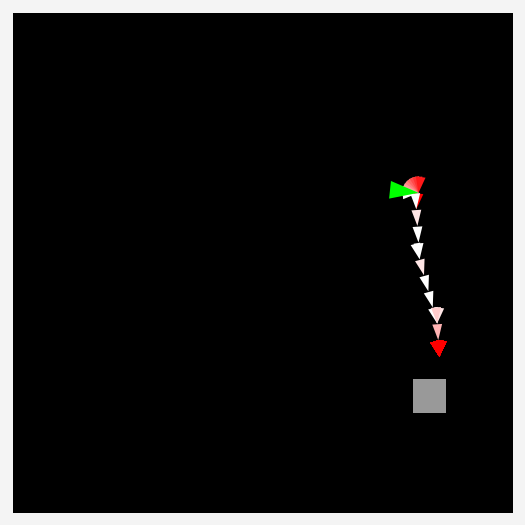

In [150]:
i = 2
fig, ax = pplt.subplots()
agent.env.get_attr('boxes')[-1][-1].draw(ax)
p = data['data']['pos'][i]
a = data['data']['angle'][i]
draw_trajectory(p, a, ax=ax)

if (data['obs'][i] == 5/6).any():
    print('Poster seen')

ax.format(xlim=[0, 300], ylim=[0, 300])


(array([36., 31.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 32.]),
 array([  8. ,  27.3,  46.6,  65.9,  85.2, 104.5, 123.8, 143.1, 162.4,
        181.7, 201. ]),
 <BarContainer object of 10 artists>)

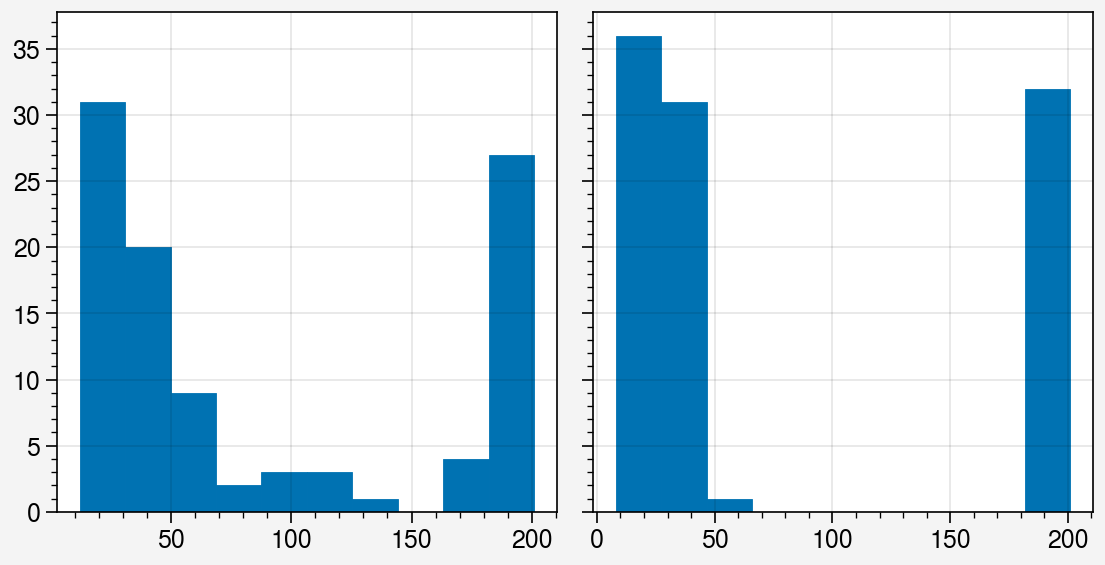

In [ ]:
fig, ax = pplt.subplots(ncols=2)
ax[0].hist(all_lengths[0])
ax[1].hist(all_lengths[1])

{'whiskers': <a list of 4 Line2D objects>,
 'caps': <a list of 4 Line2D objects>,
 'boxes': <a list of 2 Line2D objects>,
 'medians': <a list of 2 Line2D objects>,
 'fliers': <a list of 2 Line2D objects>,
 'means': []}

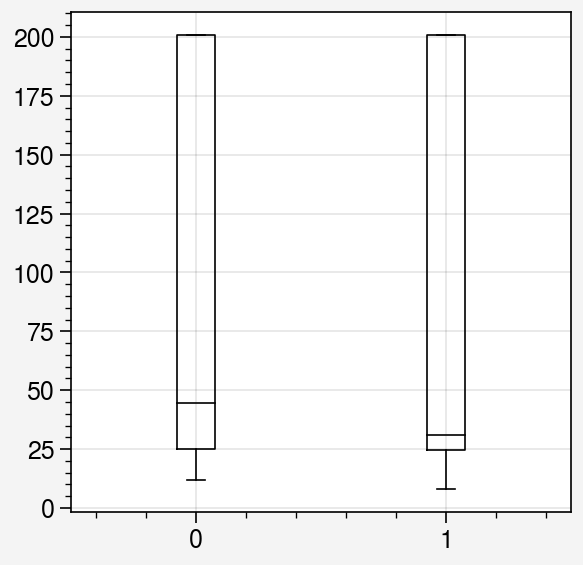

In [39]:
fig, ax = pplt.subplots()
ax.boxplot(np.array(all_lengths).T)